Breast Cancer Dataset:
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (Total: 30)
Classes: ['malignant' 'benign']
X shape: (569, 30), y shape: (569,)

Data Splitting and Scaling Complete.

--- SVM with Linear Kernel ---
Accuracy (Linear Kernel): 0.9825
Confusion Matrix (Linear Kernel):


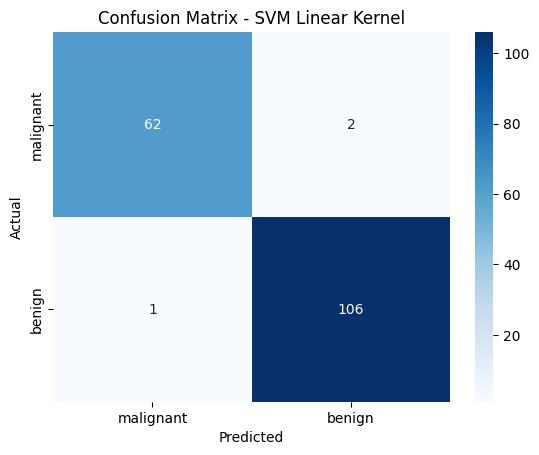

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        64
      benign       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


--- SVM with RBF Kernel ---
Accuracy (RBF Kernel, default C=1, gamma='scale'): 0.9766
Confusion Matrix (RBF Kernel):


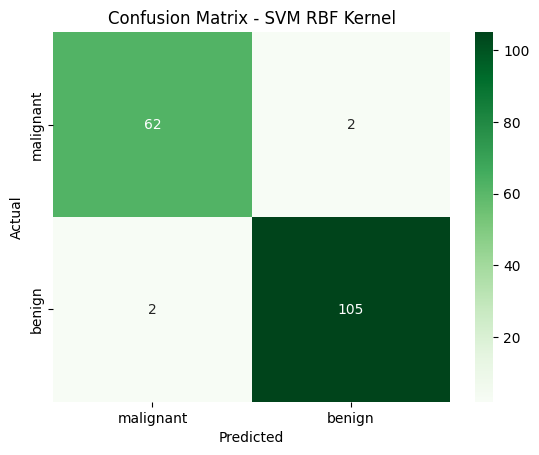

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



<ipython-input-1-5f9e560352ab>:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


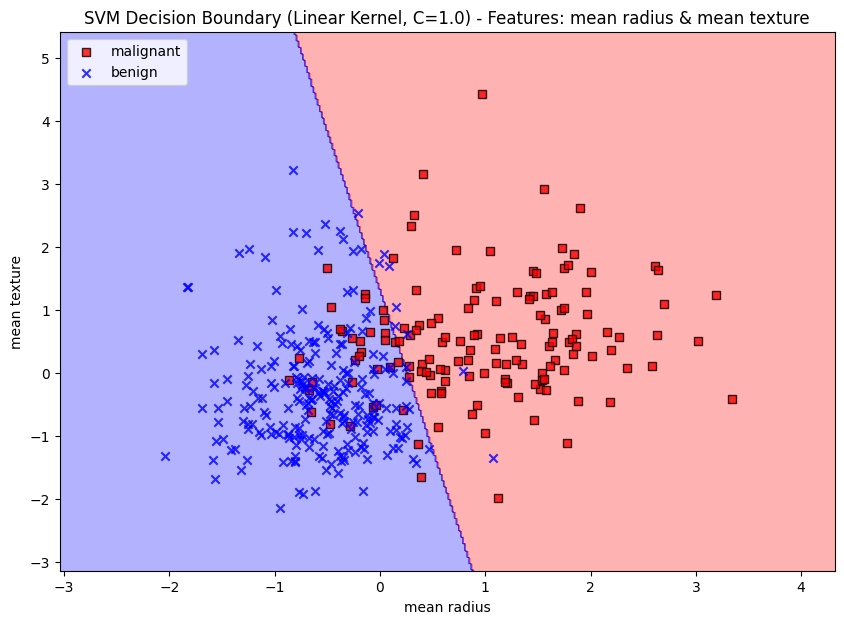

<ipython-input-1-5f9e560352ab>:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


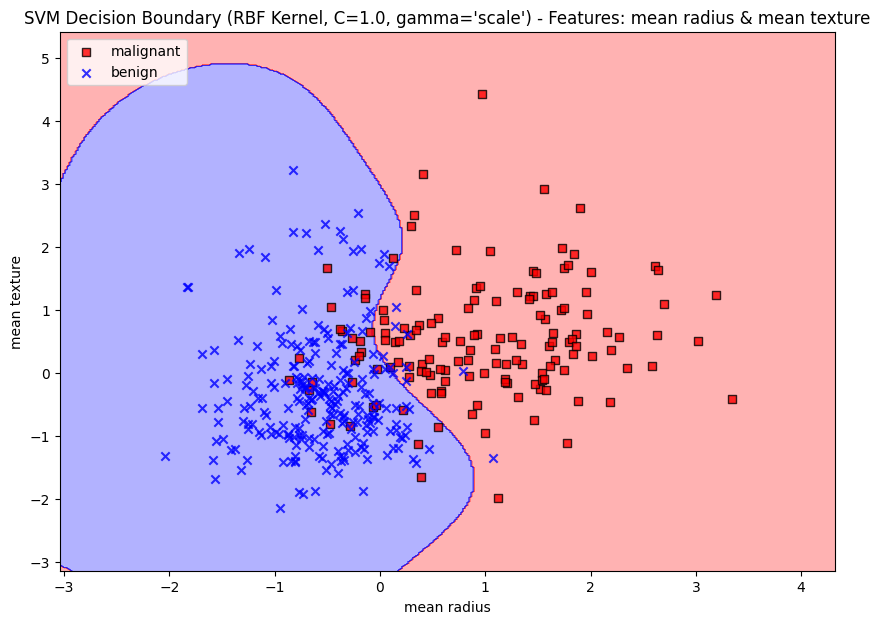


--- Hyperparameter Tuning with GridSearchCV (RBF Kernel) ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters found by GridSearchCV:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9749

Accuracy of Best SVM model on Test Set: 0.9825
Confusion Matrix (Best SVM model):


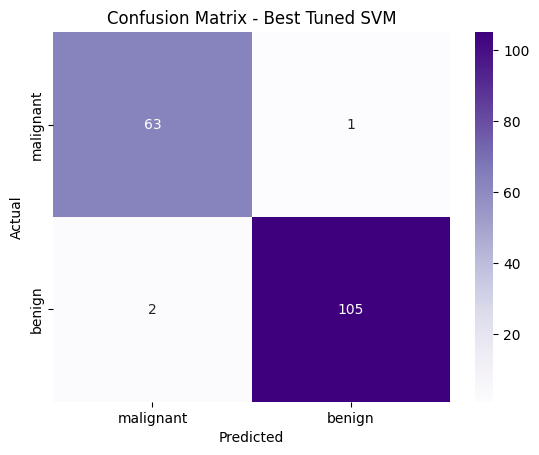

Classification Report (Best SVM model):
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        64
      benign       0.99      0.98      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


--- Cross-validation score for default RBF SVM ---


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer # Using built-in dataset
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Helper function to plot decision boundaries (for 2 features)
def plot_decision_boundaries(X, y, model, feature_names, class_names, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x') # For binary classification
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=class_names[cl],
                    edgecolor='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(loc='upper left')
    plt.title('Decision Boundaries')

# --- Task 7: Support Vector Machines (SVM) ---

# 1. Load and prepare a dataset for binary classification.
# Load Breast Cancer dataset (binary classification: malignant or benign)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names_all = cancer.feature_names
class_names = cancer.target_names # ['malignant' 'benign']

print("Breast Cancer Dataset:")
print(f"Features: {feature_names_all[:5]}... (Total: {X.shape[1]})") # Show first 5
print(f"Classes: {class_names}")
print(f"X shape: {X.shape}, y shape: {y.shape}\n")

# For simplicity in decision boundary visualization, we'll use only two features.
# Let's use 'mean radius' and 'mean texture'
X_2_features = X[:, [0, 1]] # 'mean radius' (index 0), 'mean texture' (index 1)
feature_names_2 = [feature_names_all[0], feature_names_all[1]]

# Split data into training and testing sets (using all features for main model training)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split data for 2-feature visualization model
X_train_2f, X_test_2f, y_train_2f, y_test_2f = train_test_split(X_2_features, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (SVMs are sensitive to feature scaling)
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

scaler_2f = StandardScaler()
X_train_2f_scaled = scaler_2f.fit_transform(X_train_2f)
X_test_2f_scaled = scaler_2f.transform(X_test_2f)

print("Data Splitting and Scaling Complete.\n")

# 2. Train an SVM with linear and RBF kernel.

# --- SVM with Linear Kernel ---
print("--- SVM with Linear Kernel ---")
svm_linear = SVC(kernel='linear', C=1.0, random_state=42) # C is the regularization parameter
svm_linear.fit(X_train_all_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_all_scaled)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")
print("Confusion Matrix (Linear Kernel):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear, target_names=class_names))

# --- SVM with RBF (Radial Basis Function) Kernel ---
print("\n--- SVM with RBF Kernel ---")
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # gamma defines influence of a single training example
                                                               # 'scale' uses 1 / (n_features * X.var()) as value of gamma
svm_rbf.fit(X_train_all_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_all_scaled)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel, default C=1, gamma='scale'): {accuracy_rbf:.4f}")
print("Confusion Matrix (RBF Kernel):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf, target_names=class_names))


# 3. Visualize decision boundary using 2D data.
# Train models using only the 2 selected features for visualization

# Linear SVM for 2D visualization
svm_linear_2f = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_2f.fit(X_train_2f_scaled, y_train_2f)

plt.figure(figsize=(10, 7))
plot_decision_boundaries(X_train_2f_scaled, y_train_2f, svm_linear_2f, feature_names_2, class_names)
plt.title(f'SVM Decision Boundary (Linear Kernel, C=1.0) - Features: {feature_names_2[0]} & {feature_names_2[1]}')
plt.show()

# RBF SVM for 2D visualization
svm_rbf_2f = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf_2f.fit(X_train_2f_scaled, y_train_2f)

plt.figure(figsize=(10, 7))
plot_decision_boundaries(X_train_2f_scaled, y_train_2f, svm_rbf_2f, feature_names_2, class_names)
plt.title(f'SVM Decision Boundary (RBF Kernel, C=1.0, gamma=\'scale\') - Features: {feature_names_2[0]} & {feature_names_2[1]}')
plt.show()

# 4. Tune hyperparameters like C and gamma.
# 5. Use cross-validation to evaluate performance during tuning.
print("\n--- Hyperparameter Tuning with GridSearchCV (RBF Kernel) ---")
# Define the parameter grid
# C: Regularization parameter. Strength of regularization is inversely proportional to C.
#    Must be strictly positive.
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
#        If gamma is 'scale' (default) then it uses 1 / (n_features * X.var()) as value of gamma.
#        If 'auto', uses 1 / n_features.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf'] # We are focusing on RBF for tuning
}

# Instantiate GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_all_scaled, y_train)

print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model found by GridSearchCV on the test set
best_svm_model = grid_search.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test_all_scaled)

accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"\nAccuracy of Best SVM model on Test Set: {accuracy_best_svm:.4f}")
print("Confusion Matrix (Best SVM model):")
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Best Tuned SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report (Best SVM model):")
print(classification_report(y_test, y_pred_best_svm, target_names=class_names))


# Using cross_val_score for a quick evaluation of the default RBF model
print("\n--- Cross-validation score for default RBF SVM ---")
cv_scores = cross_val_score(SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
                            X_train_all_scaled, # Use scaled training data
                            y_train,
                            cv=5, # 5-fold cross-validation
                            scoring='accuracy')